#### Load Data

In [54]:
class Review:
    def __init__(self, category, text, rating):
        self.category = category
        self.text = text
        self.rating = rating

In [55]:
files = ['./sklearn-master/data/category/Electronics_small.json',
         './sklearn-master/data/category/Books_small.json',
         './sklearn-master/data/category/Clothing_small.json',
         './sklearn-master/data/category/Grocery_small.json',
         './sklearn-master/data/category/Patio_small.json'] # 1000 each
file_categories = ["Electronics", "Books", "Clothing", "Groceries", "Patio"]

import json

reviews = []
for x in range(len(files)):
    file = files[x]
    category = file_categories[x]
    with open(file) as f:
        for line in f:
            review_json = json.loads(line)
            review = Review(category, review_json["reviewText"], review_json["overall"])
            reviews.append(review)
reviews[2022]

#### Data prep

In [56]:
class ReviewContainer:
    def __init__(self,reviews):
        self.reviews=reviews
    def get_category(self):
        return [x.category for x in self.reviews]
    def get_text(self):
        return [x.text for x in self.reviews]
    def get_rating(self):
        return[x.rating for x in self.reviews]

In [57]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reviews, test_size = 0.33, random_state=42)

training = ReviewContainer(train)
testing = ReviewContainer(test)

train_text = training.get_text()
train_category = training.get_category()

test_text = testing.get_text()
test_category = testing.get_category()

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
train_textv = vectorizer.fit_transform(train_text)
test_textv = vectorizer.transform(test_text)

print(train_text[0])
print(train_textv[0].toarray())

OMG an unbelievable story line. Patterson has to be one of the best authors around.The masterful plot of twists and turns keeps the reader on a non-stop fast moving pace with the most surprising un-expected endings.
[[0. 0. 0. ... 0. 0. 0.]]


#### Classification (svm)

In [63]:
from sklearn import svm

svm_clf = svm.SVC(C=16, kernel="linear", gamma="auto")
svm_clf.fit(train_textv, train_category)

test_textv[0]

<1x16202 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

#### Testing

In [67]:
test_sent = ["very stylish", "expensive"]
test = vectorizer.transform(test_sent)

svm_clf.predict(test)

array(['Clothing', 'Electronics'], dtype='<U11')

#### Performance

In [68]:
svm_clf.score(test_textv, test_category)

0.9090909090909091

In [70]:
from sklearn.metrics import f1_score

pred = svm_clf.predict(test_textv)
f1_score(test_category, pred, average=None)

array([0.95111111, 0.89323308, 0.88567294, 0.89891135, 0.91693291])

#### Confusion Matrix

<AxesSubplot:>

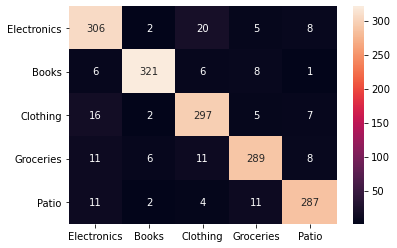

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(test_category, pred, labels=file_categories)
df_cm = pd.DataFrame(cm, index=file_categories, columns=file_categories)

sns.heatmap(df_cm, annot=True, fmt='d')